In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT 
# Clinical Data
clinical_train = pd.read_csv("data/X_train/clinical_train.csv")
clinical_test = pd.read_csv("data/X_test/clinical_test.csv")

# Molecular Data
molecular_train = pd.read_csv("data/X_train/molecular_train.csv")
molecular_test = pd.read_csv("data/X_test/molecular_test.csv")

target_train = pd.read_csv("data/X_train/target_train.csv")

# 1. Clinical data

In [ ]:
clinical_train.head() # one row per individual

,ID,CENTER,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,CYTOGENETICS
0,P132697,MSK,14.0,2.8,0.2,0.7,7.6,119.0,"46,xy,del(20)(q12)[2]/46,xy[18]"
1,P132698,MSK,1.0,7.4,2.4,0.1,11.6,42.0,"46,xx"
2,P116889,MSK,15.0,3.7,2.1,0.1,14.2,81.0,"46,xy,t(3;3)(q25;q27)[8]/46,xy[12]"
3,P132699,MSK,1.0,3.9,1.9,0.1,8.9,77.0,"46,xy,del(3)(q26q27)[15]/46,xy[5]"
4,P132700,MSK,6.0,128.0,9.7,0.9,11.1,195.0,"46,xx,t(3;9)(p13;q22)[10]/46,xx[10]"


In [14]:
clin = clinical_train.merge(target_train, on="ID", how="left")
print(clin.shape, molecular_train.shape)
clin.head()

(3323, 11) (10935, 11)


,ID,CENTER,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,CYTOGENETICS,OS_YEARS,OS_STATUS
0,P132697,MSK,14.0,2.8,0.2,0.7,7.6,119.0,"46,xy,del(20)(q12)[2]/46,xy[18]",1.115068,1.0
1,P132698,MSK,1.0,7.4,2.4,0.1,11.6,42.0,"46,xx",4.928767,0.0
2,P116889,MSK,15.0,3.7,2.1,0.1,14.2,81.0,"46,xy,t(3;3)(q25;q27)[8]/46,xy[12]",2.043836,0.0
3,P132699,MSK,1.0,3.9,1.9,0.1,8.9,77.0,"46,xy,del(3)(q26q27)[15]/46,xy[5]",2.476712,1.0
4,P132700,MSK,6.0,128.0,9.7,0.9,11.1,195.0,"46,xx,t(3;9)(p13;q22)[10]/46,xx[10]",3.145205,0.0


In [15]:
clin.info()
clin.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3323 non-null   object 
 1   CENTER        3323 non-null   object 
 2   BM_BLAST      3214 non-null   float64
 3   WBC           3051 non-null   float64
 4   ANC           3130 non-null   float64
 5   MONOCYTES     2722 non-null   float64
 6   HB            3213 non-null   float64
 7   PLT           3199 non-null   float64
 8   CYTOGENETICS  2936 non-null   object 
 9   OS_YEARS      3173 non-null   float64
 10  OS_STATUS     3173 non-null   float64
dtypes: float64(8), object(3)
memory usage: 285.7+ KB


,ID,CENTER,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,CYTOGENETICS,OS_YEARS,OS_STATUS
count,3323,3323,3214.000000,3051.000000,3130.000000,2722.000000,3213.000000,3199.000000,2936,3173.000000,3173.000000
unique,3323,23,NaN,NaN,NaN,NaN,NaN,NaN,1194,NaN,NaN
top,P132697,KI,NaN,NaN,NaN,NaN,NaN,NaN,"46,xy[20]",NaN,NaN
freq,1,900,NaN,NaN,NaN,NaN,NaN,NaN,432,NaN,NaN
mean,NaN,NaN,5.982545,6.535164,3.264735,0.955868,9.893549,167.048900,NaN,2.480713,0.504255
std,NaN,NaN,7.615439,10.247219,5.237043,2.666478,2.041158,149.477031,NaN,2.588259,0.500061
min,NaN,NaN,0.000000,0.200000,0.000000,0.000000,4.000000,2.000000,NaN,0.000000,0.000000
25%,NaN,NaN,1.000000,2.700000,1.000000,0.150000,8.500000,65.500000,NaN,0.652055,0.000000
50%,NaN,NaN,3.000000,4.100000,2.000000,0.370000,9.700000,123.000000,NaN,1.652055,1.000000
75%,NaN,NaN,8.000000,6.655000,3.690000,0.783000,11.200000,229.500000,NaN,3.572603,1.000000


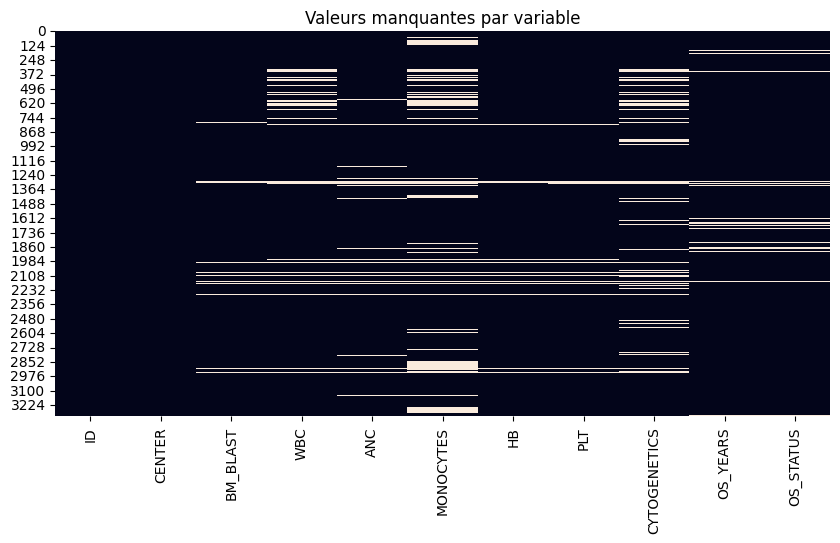

In [16]:
# Manquants
plt.figure(figsize=(10,5))
sns.heatmap(clin.isnull(), cbar=False)
plt.title("Valeurs manquantes par variable")
plt.show()

In [17]:
def log_hist(df, col, bins=40, title=None):
    ax = sns.histplot(df[col].dropna(), bins=bins, kde=True)
    if df[col].max() > 50:
        ax.set_xscale("log")
    ax.set_title(title or col)
    plt.show()

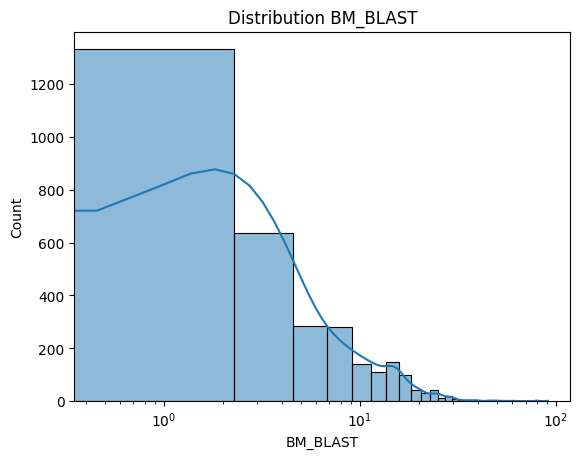

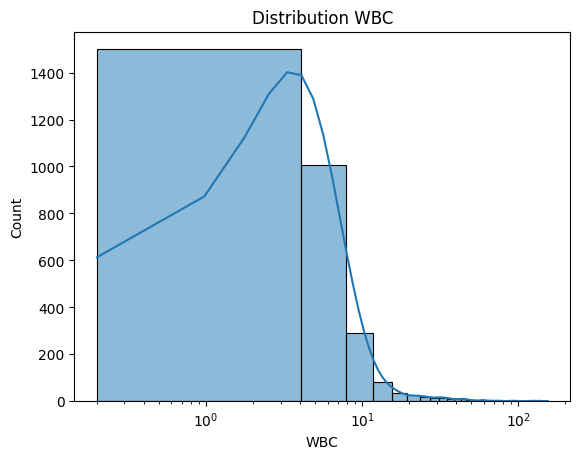

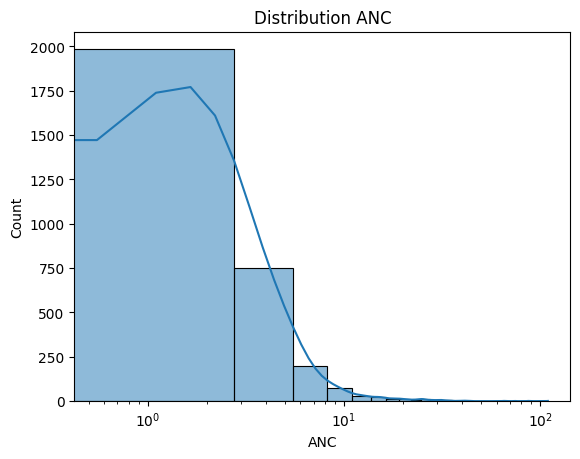

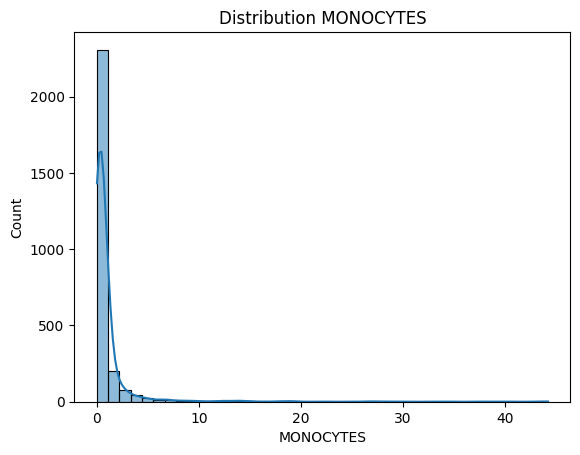

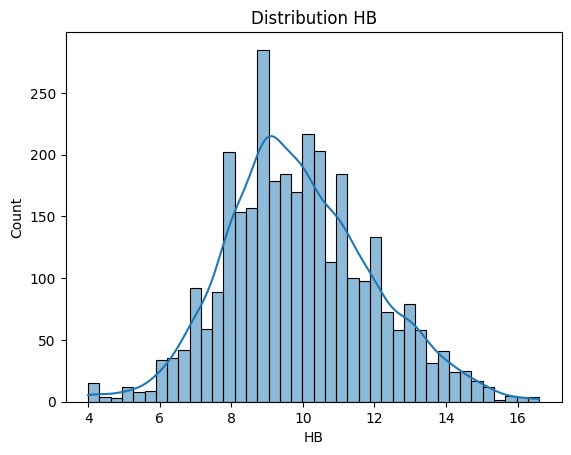

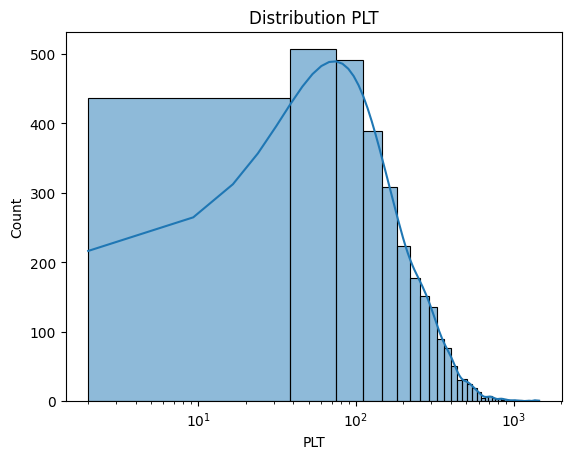

In [19]:
num_cols = ["BM_BLAST","WBC","ANC","MONOCYTES","HB","PLT"]
for c in num_cols:
    log_hist(clin, c, title=f"Distribution {c}")

Souvent queues à droites => à corriger avec du log-transfo?

In [40]:
clin[num_cols].describe().T[["mean","std","min","50%","max"]]

,mean,std,min,50%,max
BM_BLAST,5.982545,7.615439,0.0,3.00,91.00
WBC,6.535164,10.247219,0.2,4.10,154.40
ANC,3.264735,5.237043,0.0,2.00,109.62
MONOCYTES,0.955868,2.666478,0.0,0.37,44.20
HB,9.893549,2.041158,4.0,9.70,16.60
PLT,167.048900,149.477031,2.0,123.00,1451.00


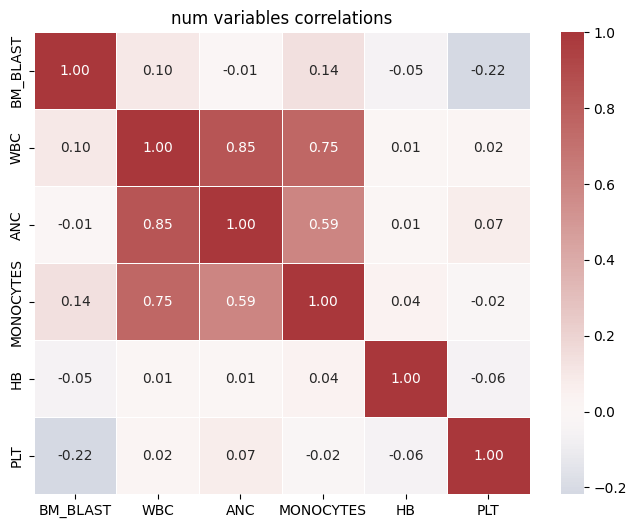

In [41]:
num_clin = clin[num_cols]
corr_num_clin = num_clin.corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_num_clin, 
    annot=True, 
    fmt=".2f", 
    cmap="vlag", 
    center=0, 
    linewidths=0.5
)
plt.title("num variables correlations")
plt.show()


3 variables super corrélées : monocyte, anc, wbc => en garde qu'une des trois ? 
(normal WBC≈ANC+MONOCYTES+(autres subtypes) => garder WBC)

centre clinique => un biais ? 

In [24]:
# cast sûrs
clin["OS_YEARS"]  = pd.to_numeric(clin["OS_YEARS"], errors="coerce")
clin["OS_STATUS"] = pd.to_numeric(clin["OS_STATUS"], errors="coerce").astype("Int64")

# drop lignes invalides pour la KM
clin_km = clin.dropna(subset=["OS_YEARS","OS_STATUS"]).copy()
clin_km = clin_km[clin_km["OS_YEARS"] >= 0]
# bool/int attendu par lifelines
clin_km["OS_STATUS"] = clin_km["OS_STATUS"].astype(int)

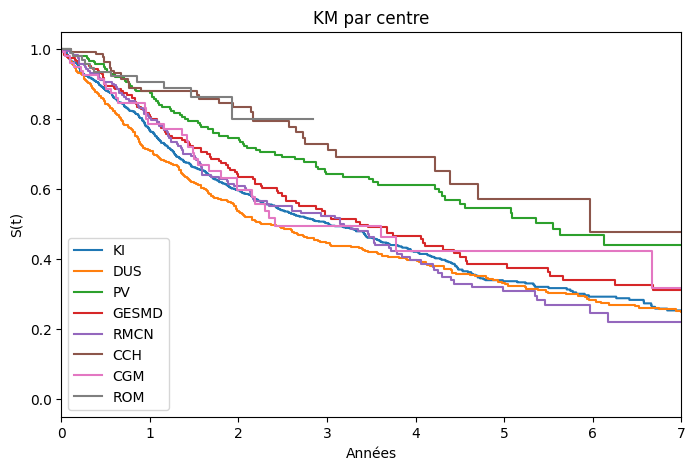

In [ ]:
# Impact du centre (batch effect?) => sur les plus gros centres
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

top_centers = clin_km["CENTER"].value_counts().head(8).index

plt.figure(figsize=(8,5))
for c in top_centers:
    sub = clin_km[clin_km["CENTER"] == c]
    kmf.fit(durations=sub["OS_YEARS"], event_observed=sub["OS_STATUS"], label=str(c))
    kmf.plot_survival_function(ci_show=False)

plt.title("KM par centre")
plt.xlim(0,7)
plt.xlabel("Années"); plt.ylabel("S(t)")
plt.show()


PV, CCH, ROM un peu différent des autres, les autres +/- superposés

In [30]:
from lifelines.statistics import multivariate_logrank_test

results = multivariate_logrank_test(
    clin["OS_YEARS"], 
    clin["CENTER"], 
    clin["OS_STATUS"]
)
results.print_summary()


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 22
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          95.99 <0.005     34.86

=> différences signif entre les centres => à prendre en compte (stratification?)

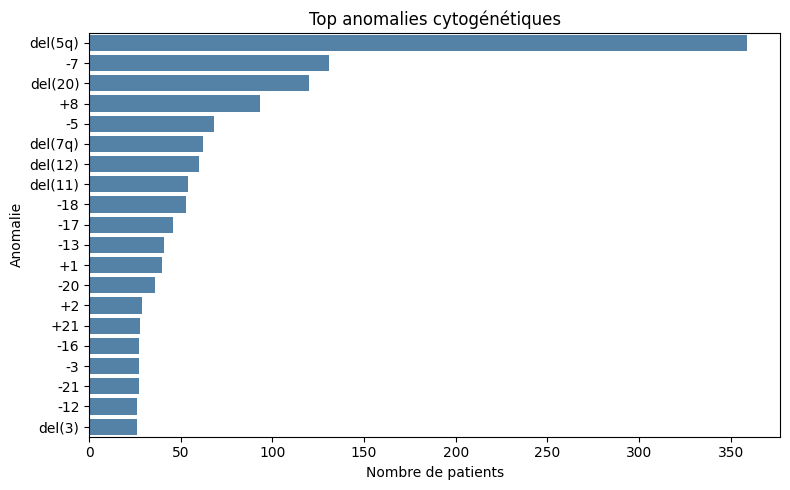

In [48]:
cyto = clin["CYTOGENETICS"].fillna("missing").astype(str)

cyto_clean = cyto.str.replace(r"[\[\]\s]", "", regex=True)


patterns = cyto_clean.str.extractall(
    r"((?:del|t|inv)\([^)]+\)|\+[\dXY]+|-[\dXY]+|complex)"
)[0]

patterns = (
    patterns
    .str.replace(r"del\(5\)$", "del(5q)", regex=True)
    .str.replace(r"del\(7\)$", "del(7q)", regex=True)
    .str.replace(r"del\(5q\d*\)", "del(5q)", regex=True)
)

terms = patterns.value_counts().head(20)

# Visualisation
plt.figure(figsize=(8,5))
sns.barplot(y=terms.index, x=terms.values, color="steelblue")
plt.title("Top anomalies cytogénétiques")
plt.xlabel("Nombre de patients")
plt.ylabel("Anomalie")
plt.tight_layout()
plt.show()



In [49]:
cyto_flags = {
    "monosomy7": r"-7",
    "del5q": r"del\(5q\)",
    "trisomy8": r"\+8",
    "t_8_21": r"t\(8;21\)",
    "inv16": r"inv\(16\)",
    "t_15_17": r"t\(15;17\)",
    "complex": r"complex"
}

for name, regex in cyto_flags.items():
    clin[name] = cyto_clean.str.contains(regex, case=False, na=False).astype(int)


In [50]:
for name in cyto_flags.keys():
    print(name,clin[name].sum())

monosomy7 169
del5q 1
trisomy8 230
t_8_21 0
inv16 0
t_15_17 1
complex 12


In [62]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

def km_cyto(df, flag_col, xmax=7.0, min_count=10, min_events=1):
    """
    Trace la courbe KM et effectue un log-rank test seulement si les deux groupes sont suffisamment représentés.
    Si un groupe a < min_count individus → rien n'est tracé.
    """
    df_ = df.dropna(subset=["OS_YEARS","OS_STATUS"]).copy()
    df_["OS_YEARS"] = df_["OS_YEARS"].astype(float).clip(upper=xmax)
    df_["OS_STATUS"] = df_["OS_STATUS"].astype(int)

    counts = df_[flag_col].value_counts()
    if len(counts) < 2 or counts.min() < min_count:
        print(f"{flag_col}: échantillon trop petit ({counts.to_dict()}) : SKIP plot + test.")
        return  # 🔹 on sort directement

    g0 = df_.query(f"{flag_col}==0")
    g1 = df_.query(f"{flag_col}==1")
    e0, e1 = int(g0["OS_STATUS"].sum()), int(g1["OS_STATUS"].sum())
    n0, n1 = len(g0), len(g1)

    if e0 < min_events or e1 < min_events:
        print(f"{flag_col}: pas assez d'événements (e0={e0}, e1={e1}) : SKIP plot + test.")
        return

    # Si tout est ok → plot
    plt.figure(figsize=(6,4))
    for val, sub in df_.groupby(flag_col):
        label = f"{flag_col}={val} (n={len(sub)}, events={int(sub['OS_STATUS'].sum())})"
        kmf.fit(sub["OS_YEARS"], sub["OS_STATUS"], label=label)
        kmf.plot_survival_function(ci_show=False)
    plt.title(f"Survie selon {flag_col}")
    plt.xlim(0, xmax); plt.ylim(0,1)
    plt.xlabel("Années"); plt.ylabel("S(t)")
    plt.grid(True, alpha=0.3)
    plt.show()

    # Log-rank test
    try:
        res = logrank_test(
            g0["OS_YEARS"], g1["OS_YEARS"],
            event_observed_A=g0["OS_STATUS"],
            event_observed_B=g1["OS_STATUS"],
            t_0=xmax
        )
        print(f"{flag_col}: log-rank p = {res.p_value:.3e}")
    except Exception as e:
        print(f"{flag_col}: log-rank erreur : {type(e).__name__}: {e}")


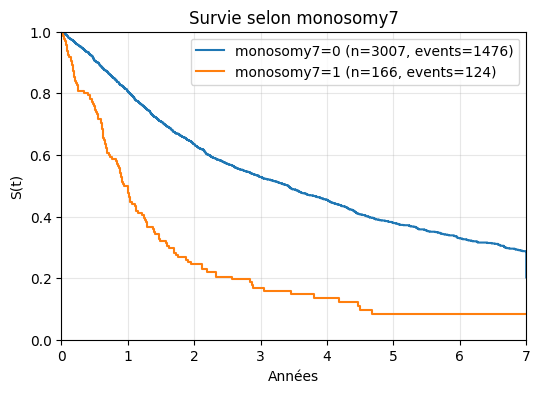

monosomy7: log-rank p = 3.980e-32
del5q: échantillon trop petit ({0: 3172, 1: 1}) : SKIP plot + test.


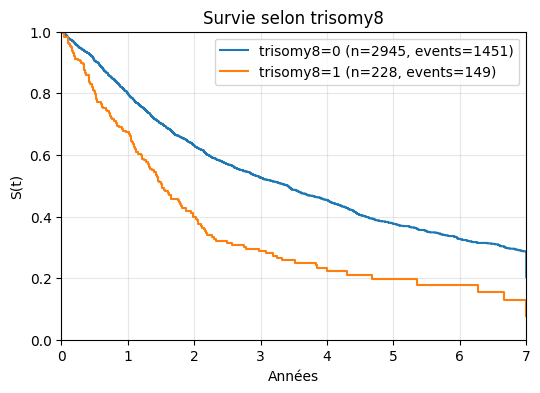

trisomy8: log-rank p = 2.131e-13
t_8_21: échantillon trop petit ({0: 3173}) : SKIP plot + test.
inv16: échantillon trop petit ({0: 3173}) : SKIP plot + test.
t_15_17: échantillon trop petit ({0: 3172, 1: 1}) : SKIP plot + test.
complex: pas assez d'événements (e0=0, e1=0) : SKIP plot + test.


In [63]:
for name in cyto_flags.keys():
    km_cyto(clin, name)


On complexifie : 

In [64]:
import re

# Repars proprement la version nettoyée que tu as déjà
cyto_raw   = clin["CYTOGENETICS"].fillna("missing").astype(str)
cyto_clean = cyto_raw.str.replace(r"[\[\]\s]", "", regex=True).str.upper()

# 1) Flags supplémentaires (binaires)
extra_flags = {
    "del7q":  r"DEL\(7Q\)",
    "del17p": r"DEL\(17P\)",
    "add11q": r"ADD\(11Q\)",
    "del20q": r"DEL\(20Q\)",
}
for name, regex in extra_flags.items():
    clin[name] = cyto_clean.str.contains(regex, na=False, regex=True).astype(int)

# 2) Ploïdie (compte chromosomique de tête: 45,46,47...)
def ploidy_class(s: str):
    # cherche un nombre au tout début (avant la première virgule)
    m = re.match(r"^(\d{2,2})[,;]", s)
    if not m:
        return "unknown"
    n = int(m.group(1))
    if n < 46:  return "hypodiploid"
    if n == 46: return "euploid_46"
    if n > 46:  return "hyperdiploid"
    return "unknown"

clin["CYTO_PLOIDY"] = cyto_clean.apply(ploidy_class)

# 3) Normal karyotype (46,XX ou 46,XY et rien d'autre d'anormal)
def is_normal_karyotype(s: str):
    # normal si commence par 46,XX ou 46,XY ET pas de del/t/inv/add/+/-/complex
    if not re.match(r"^46,(XX|XY)", s):
        return 0
    return int(not re.search(r"(DEL|INV|T|ADD|\+|-|COMPLEX)", s))

clin["CYTO_NORMAL"] = cyto_clean.apply(is_normal_karyotype)

# 4) Méta-features (nombre d’anomalies, chromosomes touchés, nb gains/pertes, complexité)
def cyto_meta(s: str):
    s = s or ""
    # liste de "morceaux" d'anomalies (séparés par virgules)
    chunks = re.findall(r"(DEL\([^)]+\)|INV\([^)]+\)|T\([^)]+\)|ADD\([^)]+\)|\+\w+|-\w+)", s)
    n_anom = len(chunks)
    # chromosomes extraits (10, 17, X, Y) dans les chunks
    chrs = set(re.findall(r"(\d+|X|Y)", "".join(chunks)))
    # gains/pertes
    n_gain = len(re.findall(r"\+\w+", s))
    n_loss = len(re.findall(r"-\w+", s))
    # complexité : au moins 3 anomalies OU mot "COMPLEX"
    complex_flag = int(n_anom >= 3 or ("COMPLEX" in s))
    return pd.Series(
        dict(
            CYTO_N_ANOM=n_anom,
            CYTO_N_CHR=len(chrs),
            CYTO_N_GAIN=n_gain,
            CYTO_N_LOSS=n_loss,
            CYTO_COMPLEX_META=complex_flag
        )
    )

cyto_meta_df = cyto_clean.apply(cyto_meta)
clin = pd.concat([clin, cyto_meta_df], axis=1)

# 5) Catégorie de risque (simplifiée, ELN-like light)
def cyto_risk_group(row):
    # Favorable
    if row.get("t_15_17",0)==1 or row.get("t_8_21",0)==1 or row.get("inv16",0)==1:
        return "favorable"
    # Adverse (regroupe mauvaises anomalies + complexité)
    adverse_rules = [
        row.get("monosomy7",0)==1,
        row.get("del5q",0)==1,
        row.get("del17p",0)==1,
        row.get("complex",0)==1 or row.get("CYTO_COMPLEX_META",0)==1,
        row.get("CYTO_PLOIDY","")=="hypodiploid"
    ]
    if any(adverse_rules):
        return "adverse"
    # Intermédiaire
    interm_rules = [
        row.get("trisomy8",0)==1,
        row.get("del20q",0)==1,
        row.get("del7q",0)==1,
        row.get("add11q",0)==1,
        row.get("CYTO_NORMAL",0)==1
    ]
    if any(interm_rules):
        return "intermediate"
    return "other"

clin["CYTO_RISK_SIMPLE"] = clin.apply(cyto_risk_group, axis=1)

# Petit résumé des fréquences utiles
to_show = [
    "CYTO_NORMAL", "CYTO_PLOIDY", "CYTO_N_ANOM", "CYTO_N_CHR",
    "CYTO_N_GAIN", "CYTO_N_LOSS", "CYTO_COMPLEX_META", "CYTO_RISK_SIMPLE",
    "del7q","del17p","add11q","del20q"
]
for col in to_show:
    vc = clin[col].value_counts(dropna=False)
    print(f"\n{col}:\n{vc}")



CYTO_NORMAL:
CYTO_NORMAL
1    1707
0    1616
Name: count, dtype: int64

CYTO_PLOIDY:
CYTO_PLOIDY
euploid_46      2294
unknown          490
hypodiploid      302
hyperdiploid     237
Name: count, dtype: int64

CYTO_N_ANOM:
CYTO_N_ANOM
0     2158
1      684
2      158
3       74
5       35
6       34
4       31
7       30
8       23
11      20
9       15
10      14
12      13
14       8
15       7
13       5
18       4
16       2
19       2
23       2
20       1
26       1
21       1
22       1
Name: count, dtype: int64

CYTO_N_CHR:
CYTO_N_CHR
0     2162
1      553
2      274
3       86
5       46
4       46
8       30
6       29
7       29
9       21
10      17
11      10
12       9
13       7
16       2
14       2
Name: count, dtype: int64

CYTO_N_GAIN:
CYTO_N_GAIN
0     2838
1      342
2       73
3       28
4       14
5       12
6        6
7        4
10       3
8        2
9        1
Name: count, dtype: int64

CYTO_N_LOSS:
CYTO_N_LOSS
0     2856
1      272
2       72
3       40
4      

Group sizes / events:
                     n  events
CYTO_RISK_SIMPLE              
intermediate      1772     777
other              867     471
adverse            533     351
favorable            1       1


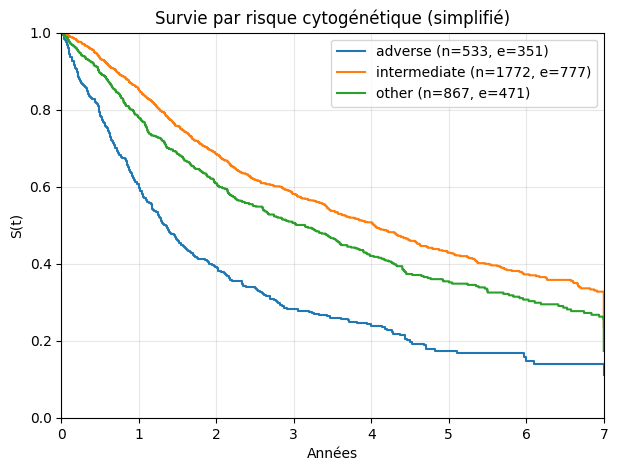

In [ ]:
df_km = clin[["OS_YEARS","OS_STATUS","CYTO_RISK_SIMPLE"]].copy()

# Assure un label pour tous
df_km["CYTO_RISK_SIMPLE"] = df_km["CYTO_RISK_SIMPLE"].fillna("unknown")

# Cast numériques + drop NaN/Inf
df_km["OS_YEARS"]  = pd.to_numeric(df_km["OS_YEARS"], errors="coerce")
df_km["OS_STATUS"] = pd.to_numeric(df_km["OS_STATUS"], errors="coerce")

df_km = df_km.replace([np.inf, -np.inf], np.nan)
df_km = df_km.dropna(subset=["OS_YEARS","OS_STATUS"])   
df_km = df_km[df_km["OS_YEARS"] >= 0]
df_km["OS_STATUS"] = df_km["OS_STATUS"].astype(int)
df_km["OS_YEARS"]  = df_km["OS_YEARS"].clip(upper=7.0)  # aligné sur la métrique

# check
print("Group sizes / events:")
print(df_km.groupby("CYTO_RISK_SIMPLE")
          .agg(n=("OS_STATUS","size"), events=("OS_STATUS","sum"))
          .sort_values("n", ascending=False))

# plot km
kmf = KaplanMeierFitter()
plt.figure(figsize=(7,5))

for grp, sub in df_km.groupby("CYTO_RISK_SIMPLE"):
    n = len(sub)
    e = int(sub["OS_STATUS"].sum())
    if n < 20:              # skip groupes minuscules
        continue
    if e == 0:              # aucun décès observé : pas de test; on peut tracer mais on évite les soucis
        print(f"{grp}: 0 événement → courbe plate, skip pour éviter erreurs.")
        continue
    try:
        kmf.fit(sub["OS_YEARS"], sub["OS_STATUS"], label=f"{grp} (n={n}, e={e})")
        kmf.plot_survival_function(ci_show=False)
    except Exception as ex:
        print(f"{grp}: SKIP ({type(ex).__name__}: {ex})")

plt.title("Survie par risque cytogénétique")
plt.xlim(0,7); plt.ylim(0,1); plt.grid(True, alpha=0.3)
plt.xlabel("Années"); plt.ylabel("S(t)")
plt.show()

In [69]:
from lifelines.statistics import multivariate_logrank_test

# Nettoyage minimal
df_test = clin[["OS_YEARS","OS_STATUS","CYTO_RISK_SIMPLE"]].copy()
df_test = df_test.dropna(subset=["OS_YEARS","OS_STATUS","CYTO_RISK_SIMPLE"])
df_test["OS_YEARS"] = df_test["OS_YEARS"].astype(float).clip(upper=7.0)
df_test["OS_STATUS"] = df_test["OS_STATUS"].astype(int)

# Test global log-rank
result = multivariate_logrank_test(
    event_durations=df_test["OS_YEARS"],
    groups=df_test["CYTO_RISK_SIMPLE"],
    event_observed=df_test["OS_STATUS"]
)

print(f"Test statistic = {result.test_statistic:.2f}")
print(f"p-value = {result.p_value:.3e}")


Test statistic = 176.04
p-value = 6.324e-38


In [70]:
from itertools import combinations
from lifelines.statistics import logrank_test

groups = df_test["CYTO_RISK_SIMPLE"].unique()
for g1, g2 in combinations(groups, 2):
    d1 = df_test[df_test["CYTO_RISK_SIMPLE"]==g1]
    d2 = df_test[df_test["CYTO_RISK_SIMPLE"]==g2]
    res = logrank_test(d1["OS_YEARS"], d2["OS_YEARS"],
                       event_observed_A=d1["OS_STATUS"], event_observed_B=d2["OS_STATUS"])
    print(f"{g1} vs {g2}: p = {res.p_value:.3e}")


other vs intermediate: p = 3.353e-05
other vs adverse: p = 5.244e-16
other vs favorable: p = 4.485e-01
intermediate vs adverse: p = 2.008e-40
intermediate vs favorable: p = 2.977e-01
adverse vs favorable: p = 9.374e-01


intermediate vs adverse très significatif,
other vs adverse également très significatif : donc “other” ≠ défavorable : profils neutres ou normaux???
(favorable trop peu individus)

ClusterSurv

In [72]:
from sklearn.cluster import KMeans
from lifelines.statistics import multivariate_logrank_test

X = clin[num_cols].fillna(0)  # features cliniques
km = KMeans(n_clusters=3, random_state=42)
clin["cluster"] = km.fit_predict(X)

res = multivariate_logrank_test(
    clin["OS_YEARS"], clin["cluster"], clin["OS_STATUS"]
)
print(f"log-rank p = {res.p_value:.3e}")


log-rank p = 7.005e-27


         count   sum
cluster             
0          146    59
1         2109  1160
2          918   381


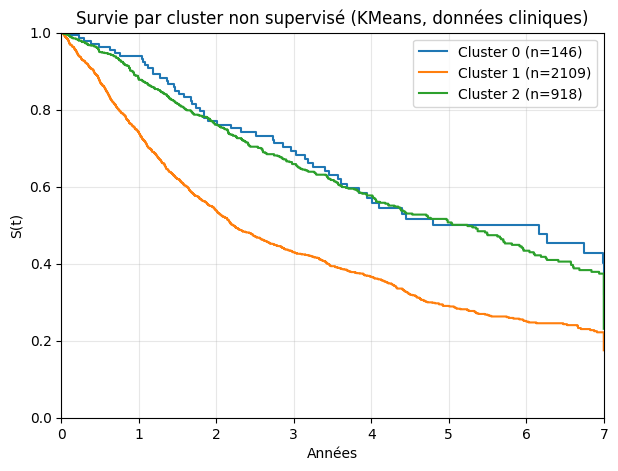

In [74]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np

kmf = KaplanMeierFitter()

# nettoyage : retire les lignes où OS ou cluster sont NaN/inf
df_km = clin[["OS_YEARS", "OS_STATUS", "cluster"]].copy()
df_km = df_km.dropna(subset=["OS_YEARS", "OS_STATUS", "cluster"])
df_km = df_km.replace([np.inf, -np.inf], np.nan)
df_km = df_km.dropna(subset=["OS_YEARS", "OS_STATUS"])
df_km["OS_YEARS"] = pd.to_numeric(df_km["OS_YEARS"], errors="coerce").clip(upper=7.0)
df_km["OS_STATUS"] = df_km["OS_STATUS"].astype(int)

# petit résumé avant plot
print(df_km.groupby("cluster")["OS_STATUS"].agg(["count", "sum"]))

# Kaplan–Meier par cluster
plt.figure(figsize=(7,5))
for c in sorted(df_km["cluster"].unique()):
    sub = df_km[df_km["cluster"] == c]
    if len(sub) < 10 or sub["OS_STATUS"].sum() == 0:
        print(f"Cluster {c}: effectif trop faible ou 0 décès, skip.")
        continue
    kmf.fit(sub["OS_YEARS"], sub["OS_STATUS"], label=f"Cluster {c} (n={len(sub)})")
    kmf.plot_survival_function(ci_show=False)

plt.title("Survie par cluster non supervisé (KMeans, données cliniques)")
plt.xlabel("Années"); plt.ylabel("S(t)")
plt.grid(True, alpha=0.3)
plt.xlim(0,7)
plt.ylim(0,1)
plt.show()
